In [54]:
import numpy as np 
import pandas as pd

data = pd.read_csv('/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Draft - Drafted.csv')

# Use 'data' DataFrame to create 'df' with only needed columns
df = data[["ALL", "Unnamed: 3"]].copy()

# Rename columns
df.rename(columns={'ALL': 'Players', 'Unnamed: 3': 'Price'}, inplace=True)

# Split 'Players' into 'Name' and 'Info'
df[['Name', 'Info']] = df['Players'].str.split('\n', expand=True)

# Further split 'Info' into 'Position', 'Team', 'Bye Week'
df[['Position', 'Team', 'Bye Week']] = df['Info'].str.split(' - ', expand=True)

# Drop the original 'Players' and 'Info' columns
df.drop(['Players', 'Info'], axis=1, inplace=True)

# Optionally rename 'Price' to 'Auction Price'
df.rename(columns={'Price': 'Auction Price'}, inplace=True)

df.to_csv('2018 Auction Data - Cleaned')

df



,Auction Price,Name,Position,Team,Bye Week
0,$66,David Johnson,RB,ARI,9
1,$65,Le'Veon Bell,RB,PIT,7
2,$60,Antonio Brown,WR,PIT,7
3,$57,Ezekiel Elliott,RB,DAL,8
4,$56,Saquon Barkley,RB,NYG,9
...,...,...,...,...,...
175,$1,Philadelphia (PHI),DST,DST,9
176,$1,Rishard Matthews,WR,TEN,8
177,$1,Tarik Cohen,RB,CHI,5
178,$1,Taywan Taylor,WR,TEN,8


In [47]:
# Clean Datas

import numpy as np 
import pandas as pd

data = pd.read_csv('/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Draft - Drafted.csv')

# Use 'data' DataFrame to create 'df' with only needed columns
df = data[["ALL", "Unnamed: 3"]].copy()

# Rename columns
df.rename(columns={'ALL': 'Players', 'Unnamed: 3': 'Price'}, inplace=True)

# Split 'Players' into 'Name' and 'Info'
df[['Name', 'Info']] = df['Players'].str.split('\n', expand=True)

# Further split 'Info' into 'Position', 'Team', 'Bye Week'
df[['Position', 'Team', 'Bye Week']] = df['Info'].str.split(' - ', expand=True)

# Drop the original 'Players' and 'Info' columns
df.drop(['Players', 'Info'], axis=1, inplace=True)

# Optionally rename 'Price' to 'Auction Price'
df.rename(columns={'Price': 'Auction Price'}, inplace=True)

df.to_csv('2022 Auction Data - Cleaned')

df

,Auction Price,Name,Position,Team,Bye Week
0,$62,Jonathan Taylor,RB,IND,14
1,$58,Christian McCaffrey,RB,CAR,13
2,$55,Austin Ekeler,RB,LAC,8
3,$50,Najee Harris,RB,PIT,9
4,$47,Josh Allen,QB,BUF,7
...,...,...,...,...,...
187,$1,Pat Freiermuth,TE,PIT,9
188,$1,Rachaad White,RB,TB,11
189,$1,San Francisco 49ers,DST,DST,9
190,$1,Tyler Allgeier,RB,ATL,14


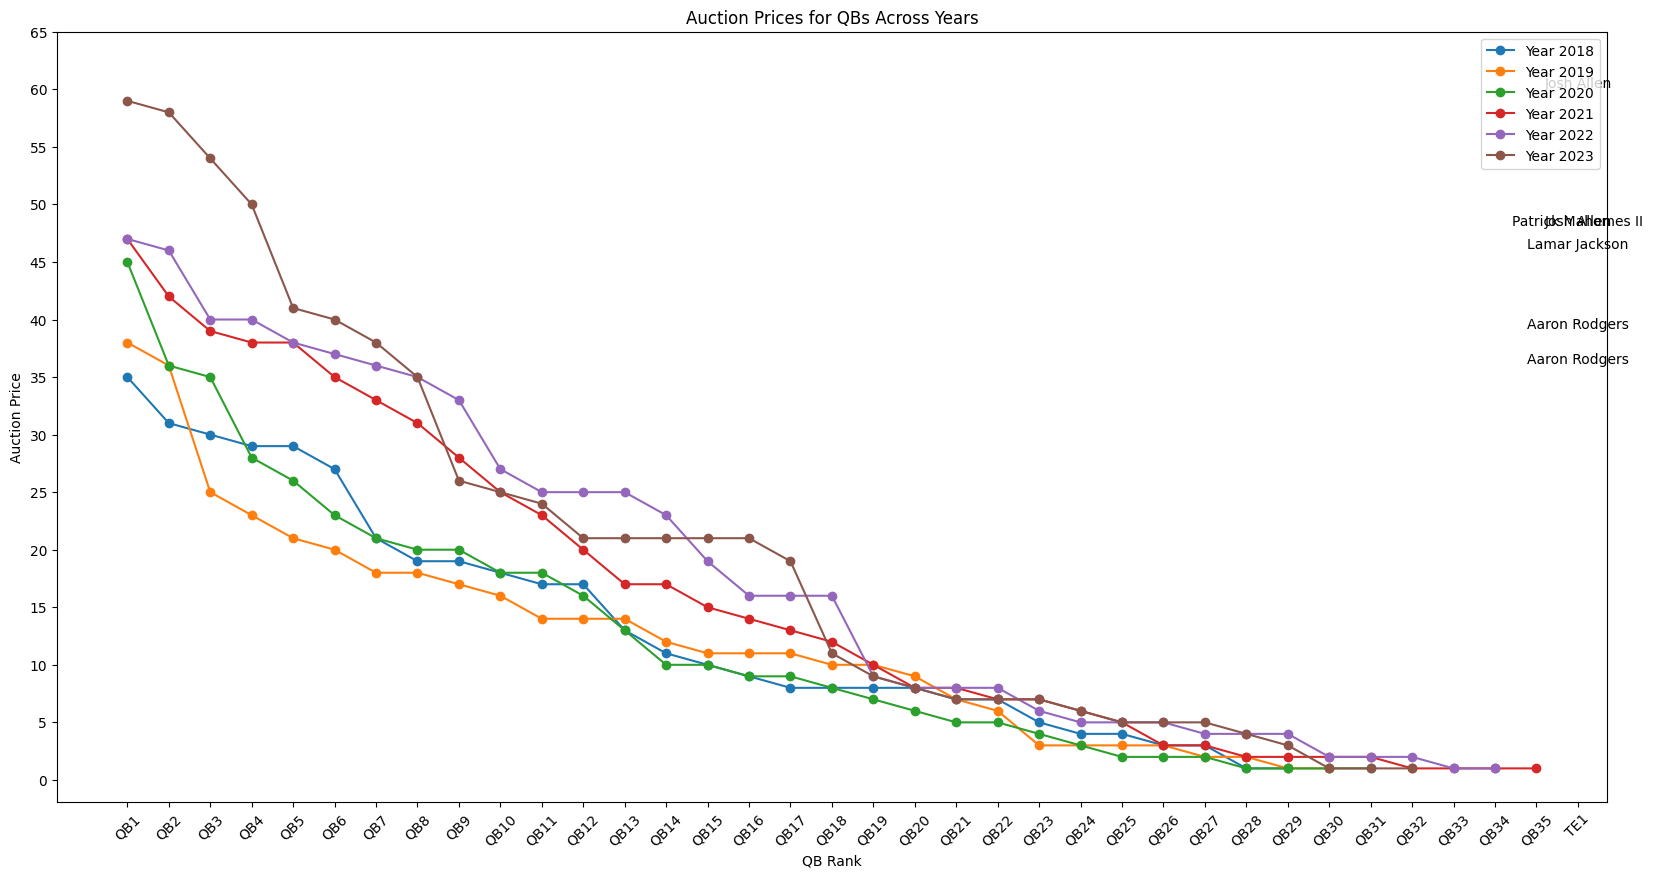

In [70]:
# QB Prices

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample CSV files for the years
csv_files = [
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2019 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2020 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2021 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2023 Auction Data - Cleaned'
]

# Initialize the plot with a larger size
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each year's CSV file
for idx, file in enumerate(csv_files):
    # Read the data
    df = pd.read_csv(file)
    
    # Convert 'Auction Price' to integers
    df['Auction Price'] = df['Auction Price'].str.replace('$', '').astype(int)

    # Filter for WRs
    wr_df = df[df['Position'] == 'QB']

    # Sort WRs by their 'Auction Price' in descending order
    sorted_wr = wr_df.sort_values('Auction Price', ascending=False)
    
    # Create a label for this year
    label = f"Year {2018 + idx}"
    
    # Plot this year's data
    ax.plot([f"QB{rank+1}" for rank in range(sorted_wr.shape[0])], sorted_wr['Auction Price'], marker='o', label=label)
    
    # Annotate the names of top 5 WRs for each year
    for rank, (index, row) in enumerate(sorted_wr.head(1).iterrows()):
        ax.annotate(f"{row['Name']}", (f"TE{rank+1}", row['Auction Price']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
ax.set_ylabel('Auction Price')
ax.set_yticks(np.arange(0, 70, 5))  # Set yticks to increment by 5
ax.set_xlabel('QB Rank')
ax.set_title('Auction Prices for QBs Across Years')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate lines for different years
ax.legend()

# Show the plot
plt.show()

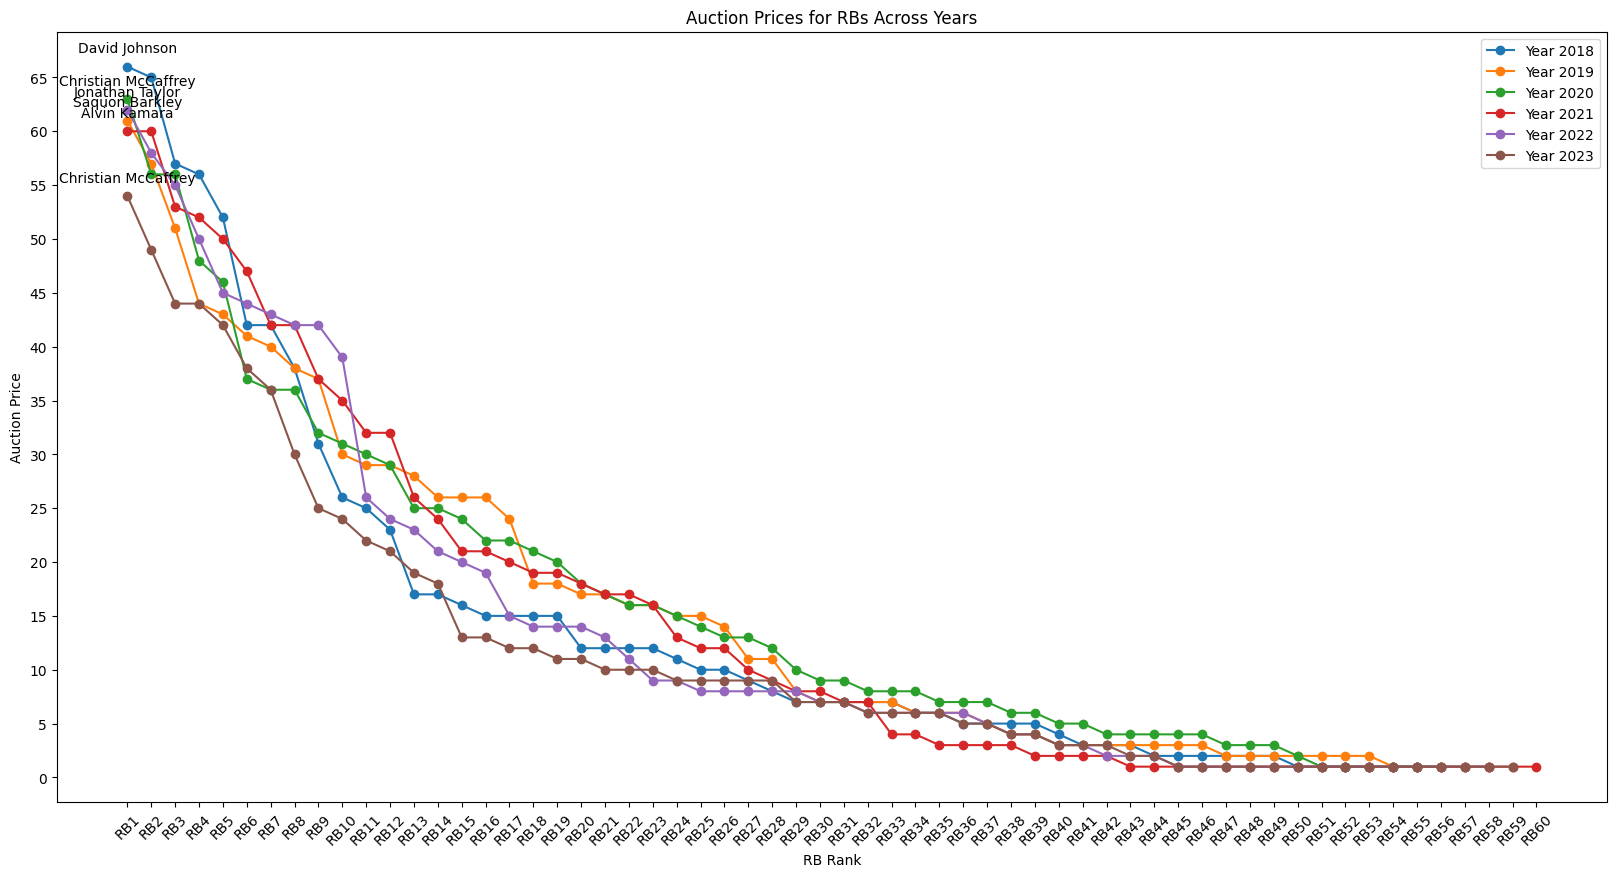

In [71]:
# RB Prices

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample CSV files for the years
csv_files = [
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2019 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2020 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2021 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2023 Auction Data - Cleaned'
]

# Initialize the plot with a larger size
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each year's CSV file
for idx, file in enumerate(csv_files):
    # Read the data
    df = pd.read_csv(file)
    
    # Convert 'Auction Price' to integers
    df['Auction Price'] = df['Auction Price'].str.replace('$', '').astype(int)

    # Filter for WRs
    wr_df = df[df['Position'] == 'RB']

    # Sort WRs by their 'Auction Price' in descending order
    sorted_wr = wr_df.sort_values('Auction Price', ascending=False)
    
    # Create a label for this year
    label = f"Year {2018 + idx}"
    
    # Plot this year's data
    ax.plot([f"RB{rank+1}" for rank in range(sorted_wr.shape[0])], sorted_wr['Auction Price'], marker='o', label=label)
    
    # Annotate the names of top 5 WRs for each year
    for rank, (index, row) in enumerate(sorted_wr.head(1).iterrows()):
        ax.annotate(f"{row['Name']}", (f"RB{rank+1}", row['Auction Price']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
ax.set_ylabel('Auction Price')
ax.set_yticks(np.arange(0, 70, 5))  # Set yticks to increment by 5
ax.set_xlabel('RB Rank')
ax.set_title('Auction Prices for RBs Across Years')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate lines for different years
ax.legend()

# Show the plot
plt.show()

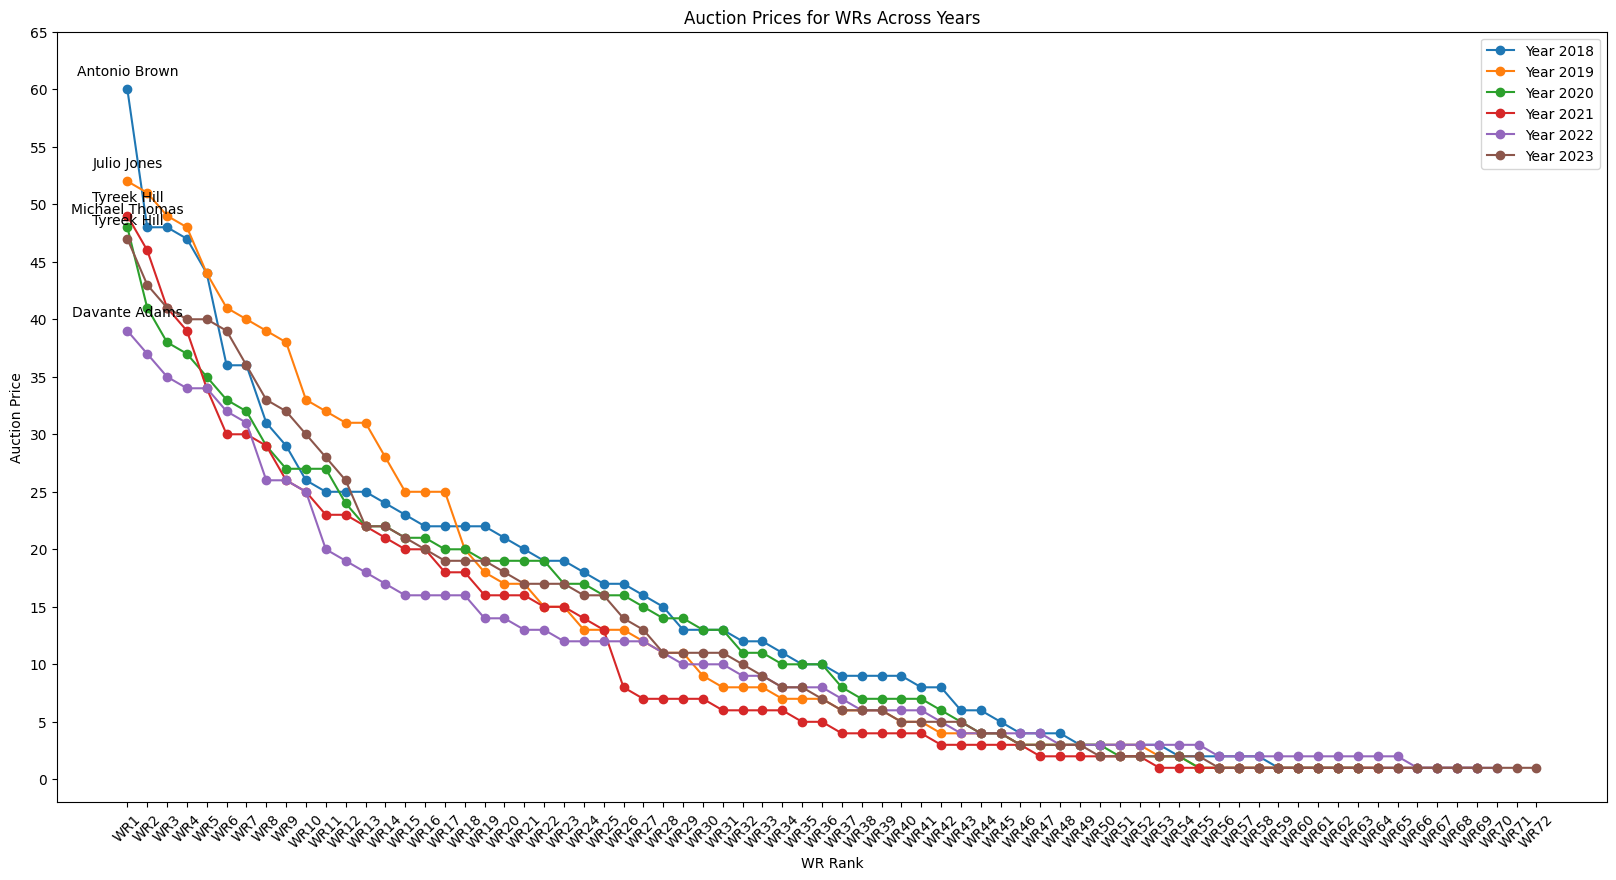

In [74]:
# WR Prices 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample CSV files for the years
csv_files = [
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2019 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2020 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2021 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2023 Auction Data - Cleaned'
]

# Initialize the plot with a larger size
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each year's CSV file
for idx, file in enumerate(csv_files):
    # Read the data
    df = pd.read_csv(file)
    
    # Convert 'Auction Price' to integers
    df['Auction Price'] = df['Auction Price'].str.replace('$', '').astype(int)

    # Filter for WRs
    wr_df = df[df['Position'] == 'WR']

    # Sort WRs by their 'Auction Price' in descending order
    sorted_wr = wr_df.sort_values('Auction Price', ascending=False)
    
    # Create a label for this year
    label = f"Year {2018 + idx}"
    
    # Plot this year's data
    ax.plot([f"WR{rank+1}" for rank in range(sorted_wr.shape[0])], sorted_wr['Auction Price'], marker='o', label=label)
    
    # Annotate the names of top 5 WRs for each year
    for rank, (index, row) in enumerate(sorted_wr.head(1).iterrows()):
        ax.annotate(f"{row['Name']}", (f"WR{rank+1}", row['Auction Price']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
ax.set_ylabel('Auction Price')
ax.set_yticks(np.arange(0, 70, 5))  # Set yticks to increment by 5
ax.set_xlabel('WR Rank')
ax.set_title('Auction Prices for WRs Across Years')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate lines for different years
ax.legend()

# Show the plot
plt.show()

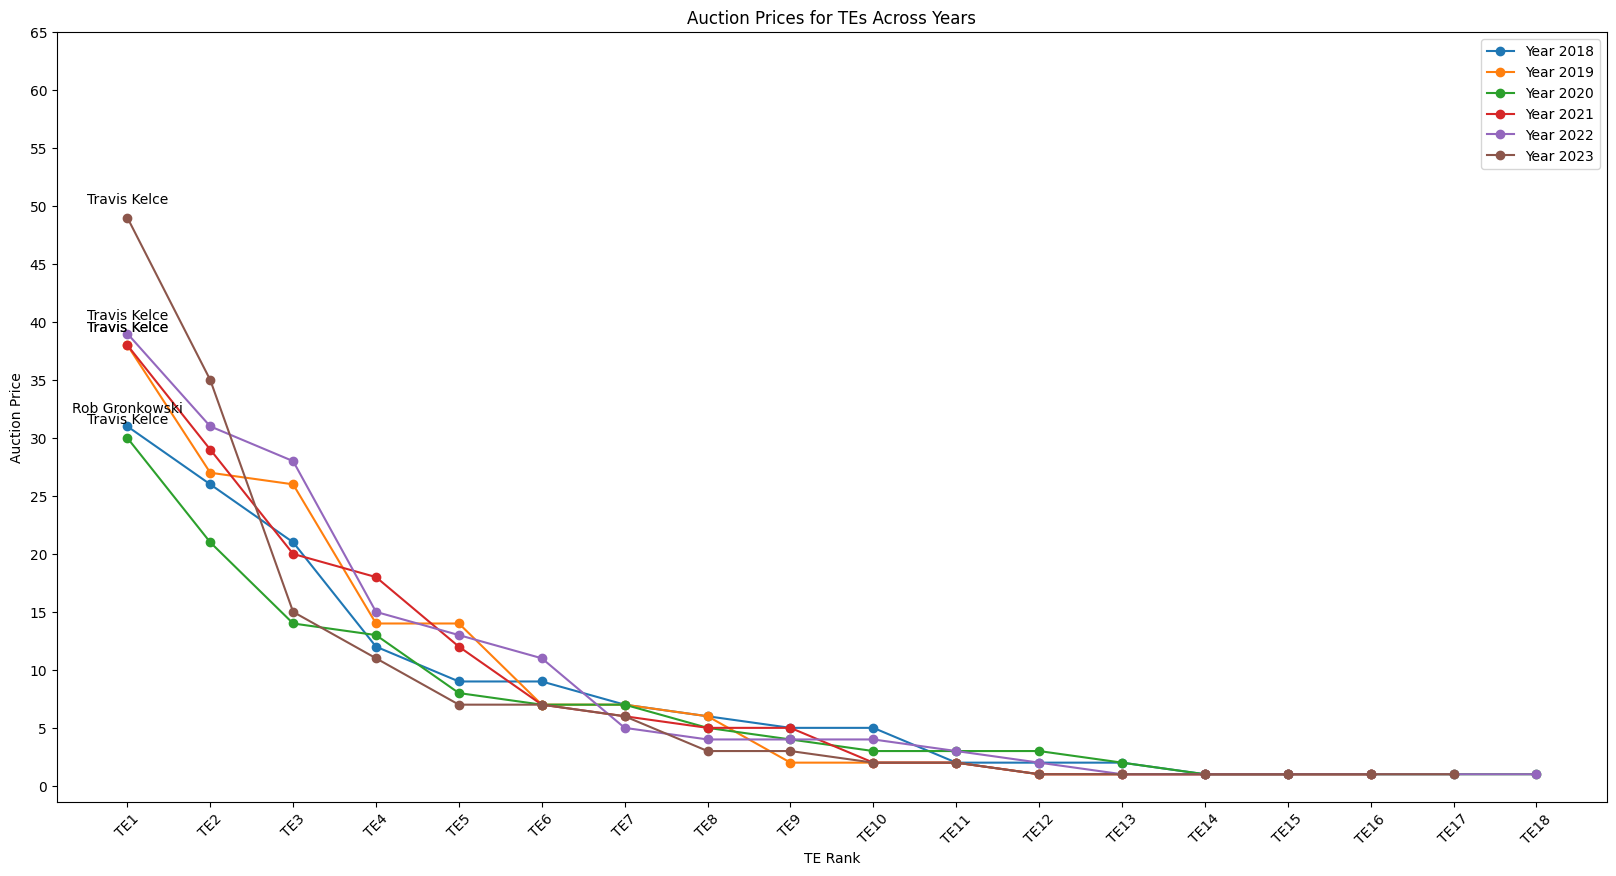

In [68]:
# TE Prices

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample CSV files for the years
csv_files = [
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2019 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2020 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2021 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2023 Auction Data - Cleaned'
]

# Initialize the plot with a larger size
fig, ax = plt.subplots(figsize=(20, 10))

# Loop through each year's CSV file
for idx, file in enumerate(csv_files):
    # Read the data
    df = pd.read_csv(file)
    
    # Convert 'Auction Price' to integers
    df['Auction Price'] = df['Auction Price'].str.replace('$', '').astype(int)

    # Filter for WRs
    wr_df = df[df['Position'] == 'TE']

    # Sort WRs by their 'Auction Price' in descending order
    sorted_wr = wr_df.sort_values('Auction Price', ascending=False)
    
    # Create a label for this year
    label = f"Year {2018 + idx}"
    
    # Plot this year's data
    ax.plot([f"TE{rank+1}" for rank in range(sorted_wr.shape[0])], sorted_wr['Auction Price'], marker='o', label=label)
    
    # Annotate the names of top 5 WRs for each year
    for rank, (index, row) in enumerate(sorted_wr.head(1).iterrows()):
        ax.annotate(f"{row['Name']}", (f"TE{rank+1}", row['Auction Price']), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels and title
ax.set_ylabel('Auction Price')
ax.set_yticks(np.arange(0, 70, 5))  # Set yticks to increment by 5
ax.set_xlabel('TE Rank')
ax.set_title('Auction Prices for TEs Across Years')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend to differentiate lines for different years
ax.legend()

# Show the plot
plt.show()

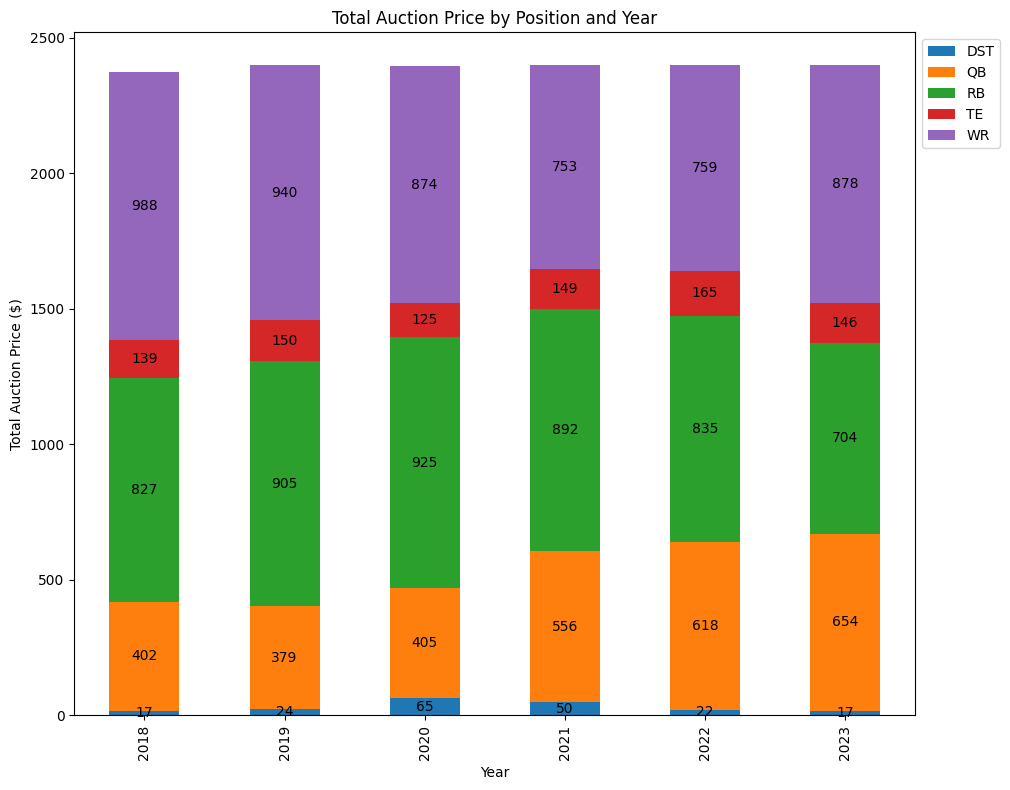

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Sample CSV files for the years
csv_files = [
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2018 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2019 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2020 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2021 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned',
    '/Users/jeremycarter/Code/SavvyCoders/capstone/2023 Auction Data - Cleaned'
]

position_totals = {}

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df['Auction Price'] = df['Auction Price'].str.replace('$', '').astype(int)
    year_total = df.groupby('Position')['Auction Price'].sum()
    position_totals[os.path.basename(csv_file).split(' ')[0]] = year_total

# Convert the nested dictionary to a DataFrame
df_totals = pd.DataFrame.from_dict(position_totals, orient='index').fillna(0).sort_index()

# Create the stacked bar chart
ax = df_totals.plot(kind='bar', stacked=True, figsize=(12, 8))

# Labels and title
plt.ylabel('Total Auction Price ($)')
plt.xlabel('Year')
plt.title('Total Auction Price by Position and Year')

# Rename X-axis labels to just the years
ax.set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023])

# Move the legend outside of the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Annotate each component of the stacked bar with its value
cumulative_size = [0 for _ in range(len(df_totals))]
for i, column in enumerate(df_totals.columns):
    for j, value in enumerate(df_totals[column]):
        half_value = value / 2.0
        label_position = cumulative_size[j] + half_value

        ax.text(j, label_position, str(int(value)), ha='center', va='center')

        cumulative_size[j] += value

# Adjust layout to fit legend
plt.tight_layout(rect=[0,0,0.85,1])

# Show the plot
plt.show()

In [117]:
# Downloading Scoring Data

import numpy as np 
import pandas as pd
import re

scoring_data = pd.read_csv('/Users/jeremycarter/Code/SavvyCoders/capstone/Scoring Leaders - 2019 (Top 300).csv')
scoring_data

# Read Auction Data
auction_data = pd.read_csv('/Users/jeremycarter/Code/SavvyCoders/capstone/2022 Auction Data - Cleaned')

# List of all possible teams and positions for validation
valid_teams = ['ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN', 'DET', 'GB', 'HOU', 
               'IND', 'JAX', 'KC', 'MIA', 'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'LV', 'PHI', 'PIT',
               'LAC', 'SF', 'SEA', 'LAR', 'TB', 'TEN', 'WAS']
               
valid_positions = ['QB', 'RB', 'WR', 'TE', 'DEF']

# Function to split the 'PLAYER' field into 'Name', 'Team', and 'Position'
def split_player_info(player_str):
    name, rest = player_str.split('\n')
    name = name.replace('Q', '')  # Remove 'Q' in some names

    # Convert 'rest' to uppercase for case-insensitive matching
    rest_upper = rest.upper()

    for team in valid_teams:
        if team in rest_upper:
            rest = re.sub(team, '', rest, flags=re.IGNORECASE)
            break
    else:
        team = 'Unknown'
        
    for position in valid_positions:
        if position in rest_upper:
            rest = re.sub(position, '', rest, flags=re.IGNORECASE)
            break
    else:
        position = 'Unknown'

    return name.strip(), team.strip(), position.strip()

    return name.strip(), team.strip(), position.strip()
# Apply the function and create new columns
scoring_data['Name'], scoring_data['Team'], scoring_data['Position'] = zip(*scoring_data['PLAYER'].apply(split_player_info))

# Drop the original 'PLAYER' column
scoring_data.drop('PLAYER', axis=1, inplace=True)

# Add a 'Rank' column
scoring_data['Rank'] = scoring_data.index + 1

# Reorder columns
scoring_data = scoring_data[['Rank', 'Name', 'Team', 'Position', 'FPTS', 'AVG']]

scoring_data.to_csv('2019 Scoring Data')



In [140]:
# Creating a Summary Sheet

import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

auction_data19 = pd.read_csv('2019 Auction Data - Cleaned')
scoring_data19 = pd.read_csv('2019 Scoring Data')

# Function to find the closest match for each player's name
def find_closest_name(player_name, player_list, min_score=80):
    closest_match, score = process.extractOne(player_name, player_list)
    if score >= min_score:
        return closest_match
    else:
        return "UD"  # Stands for Undrafted

# List of player names from the auction data
auction_player_names = auction_data19['Name'].tolist()

# Add a new column 'Auction Price' to the scoring data DataFrame
# Initialize it with "UD" (for Undrafted)
scoring_data19['Auction Price'] = "UD"

# Iterate through each row of the scoring data
for index, row in scoring_data19.iterrows():
    player_name = row['Name']
    closest_name = find_closest_name(player_name, auction_player_names)
    
    if closest_name != "UD":
        # Find the auction price for the closest match and update the row
        auction_price = auction_data19.loc[auction_data19['Name'] == closest_name, 'Auction Price'].iloc[0]
        scoring_data19.at[index, 'Auction Price'] = auction_price

# Save the new DataFrame to a CSV file, if needed
# scoring_data22.to_csv('Scoring_Data_with_Auction_Price.csv', index=False)

scoring_data19.drop("Unnamed: 0", axis=1, inplace=True)

# Show the new DataFrame
scoring_data19


scoring_data19.to_csv('2019 Summary Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '2019 Auction Data - Cleaned'

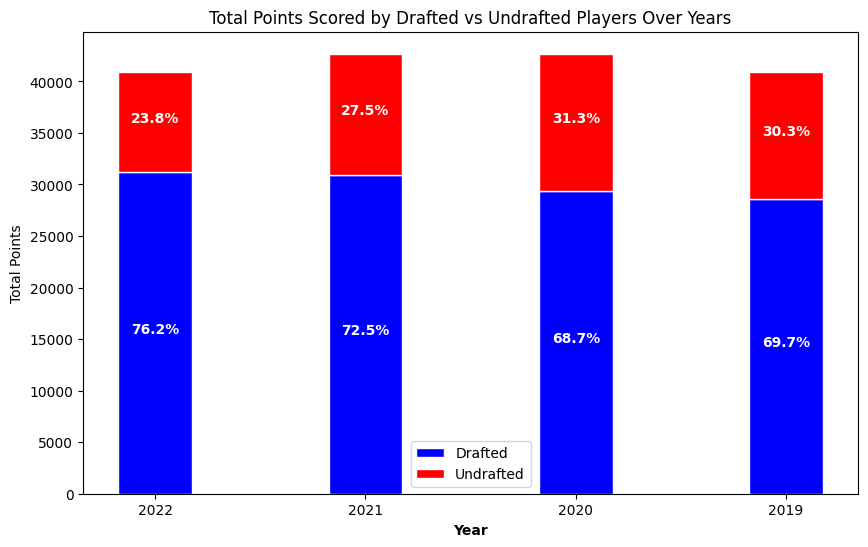

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# List of file names
files = [
    '2022 Summary Data.csv',
    '2021 Summary Data.csv',
    '2020 Summary Data.csv',
    '2019 Summary Data.csv'
]

drafted_points = []
undrafted_points = []

# Looping through each file
for file in files:
    df = pd.read_csv(file)
    
    # Filtering and summing for drafted players
    total_points_drafted = df[df['Auction Price'] != 'UD']['FPTS'].sum()
    drafted_points.append(total_points_drafted)
    
    # Filtering and summing for undrafted players
    total_points_undrafted = df[df['Auction Price'] == 'UD']['FPTS'].sum()
    undrafted_points.append(total_points_undrafted)

# X-axis values
years = ['2022', '2021', '2020', '2019']

# Creating the stacked bar chart
bar_width = 0.35
r = range(len(years))

plt.figure(figsize=(10, 6))

bar1 = plt.bar(r, drafted_points, color='blue', edgecolor='white', width=bar_width, label='Drafted')
bar2 = plt.bar(r, undrafted_points, bottom=drafted_points, color='red', edgecolor='white', width=bar_width, label='Undrafted')

# Adding the percentages on top of bars
for i in range(len(years)):
    drafted_percentage = (drafted_points[i] / (drafted_points[i] + undrafted_points[i])) * 100
    undrafted_percentage = (undrafted_points[i] / (drafted_points[i] + undrafted_points[i])) * 100

    plt.text(i, drafted_points[i]/2, f"{drafted_percentage:.1f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, drafted_points[i] + undrafted_points[i]/2, f"{undrafted_percentage:.1f}%", ha='center', color='white', fontweight='bold')

# Labelling
plt.xlabel('Year', fontweight='bold')
plt.xticks(r, years)
plt.ylabel('Total Points')
plt.title('Total Points Scored by Drafted vs Undrafted Players Over Years')
plt.legend()

# Display the plot
plt.show()




In [143]:
import pandas as pd

# List of file names
files = [
    '2022 Summary Data.csv',
    '2021 Summary Data.csv',
    '2020 Summary Data.csv',
    '2019 Summary Data.csv'
]

dfs = [pd.read_csv(f) for f in files]
all_data = pd.concat(dfs)

# Remove undrafted players and calculate value (points per dollar)
all_data = all_data[all_data['Auction Price'] != 'UD']
all_data['Value'] = all_data['FPTS'] / all_data['Auction Price'].str.replace('$', '').astype(float)
all_data['Auction Price'] = all_data['Auction Price'].str.replace('$', '').astype(float)

team = []
budget = 200

# Define team composition
composition = {
    'QB': 2,
    'RB': 3,
    'WR': 3,
    'TE': 1
}

for pos, count in composition.items():
    top_players = all_data[all_data['Position'] == pos].nlargest(count, 'Value')
    team.extend(top_players.values)
    budget -= top_players['Auction Price'].sum()

# Rebalance to use full budget if necessary
while budget > 0 and len(team) < sum(composition.values()):
    remaining_players = all_data[~all_data['Name'].isin([x[1] for x in team])]
    best_next_player = remaining_players.nlargest(1, 'Value')
    if best_next_player['Auction Price'].iloc[0] <= budget:
        team.extend(best_next_player.values)
        budget -= best_next_player['Auction Price'].iloc[0]
    else:
        break

best_team = pd.DataFrame(team, columns=all_data.columns)
print(best_team)

print(f"Remaining Budget: ${budget:.2f}")

   Unnamed: 0  Rank              Name Team Position    FPTS   AVG  \
0          12    13    Justin Herbert  LAC       QB  334.48  22.3   
1          57    58   Jimmy Garoppolo   SF       QB  212.40  14.2   
2          66    67   Jerick McKinnon   KC       RB  196.30  11.5   
3          65    66      Nyheim Hines  IND       RB  193.20  12.1   
4         102   103      Tony Pollard  DAL       RB  160.60  10.7   
5          23    24  Justin Jefferson  MIN       WR  273.20  17.1   
6          34    35     Mike Williams  LAC       WR  246.60  15.4   
7          52    53        John Brown  BUF       WR  221.54  14.8   
8          80    81     Austin Hooper  ATL       TE  191.70  14.7   

   Auction Price   Value  
0            1.0  334.48  
1            1.0  212.40  
2            1.0  196.30  
3            1.0  193.20  
4            1.0  160.60  
5            1.0  273.20  
6            1.0  246.60  
7            1.0  221.54  
8            1.0  191.70  
Remaining Budget: $191.00
